In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import sklearn.metrics as skm
import sklearn.preprocessing as skp
import sklearn.svm as svm
import sklearn.tree as svt
import sklearn.ensemble as ske
import seaborn as sns
import xgboost
csv = pd.read_csv('hr-analytics.csv') #requirement 1 reading the csv data

In [2]:
csv_dummies = pd.get_dummies(csv)# requirement2 : one hot coding for non number type

In [3]:
nul_dataframe = pd.isna(csv_dummies) # requirement3 : filling Nan with column average
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    if(len(np.where(ser)[0])):       # find Nan
        csv_dummies[str(series_null)].fillna(value=csv_dummies[str(series_null)].mean(),inplace=True) # fillna with average

In [4]:
left = csv_dummies['left'] # extract left
csv_dummies_heat = csv_dummies
csv_dummies = csv_dummies.drop(columns=['left']) #drop left

In [5]:
y_train , y_test = left[:round(len(left)*0.7)] , left[round(len(left)*0.7):]
x_train , x_test = csv_dummies[:round(len(left)*0.7)] , csv_dummies[round(len(left)*0.7):]
y_test = np.array(y_test) #splitting data set with ratio of 7:3 , for the first part of requirement4

In [6]:
logistic_learn = skl.LogisticRegression().fit(x_train,y_train)
SVM_learn = svm.LinearSVC().fit(x_train,y_train)
DECISION_learn = svt.DecisionTreeClassifier().fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
logistic_y_predict = logistic_learn.predict(x_test)
SVM_y_predict = SVM_learn.predict(x_test)
DECISION_learn = DECISION_learn.predict(x_test)

logistic_score = skm.accuracy_score(y_test,logistic_y_predict)
SVM_score = skm.accuracy_score(y_test,SVM_y_predict)
DECISION_score = skm.accuracy_score(y_test,DECISION_learn)

print("logistic score",logistic_score)
print("SVM score",SVM_score) #requirement 5
print("decision tree score",DECISION_score)

logistic score 0.5964444444444444
SVM score 0.6255555555555555
decision tree score 0.9766666666666667


# Discussion : Decision Tree , SVM , logistic , which is better on this 'left' prediction?

According to the accuracy score of three model , the best is Decision tree , in which is based on seperate the data group multiple times (in order to fit train set), and SVM and logistic can only seperate once , so the accuracy of decision tree is much higher than svm , and logistic model

---

In [8]:
csv = pd.read_csv('titanic_train.csv')

In [9]:
csv_dummies = pd.get_dummies(csv)

In [10]:
nul_dataframe = pd.isna(csv_dummies) # requirement3 : filling Nan with column average
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    if(len(np.where(ser)[0])):       # find Nan
        csv_dummies[str(series_null)].fillna(value=csv_dummies[str(series_null)].mean(),inplace=True) # fillna with average

In [11]:
survived = csv_dummies['survived']
csv_dummies_heat = csv_dummies
csv_dummies = csv_dummies.drop(columns=['survived'])

corr_matrix = csv_dummies_heat.corr() # for requirement 6 i extract the correlation matrix , to see whether it is correlated
#sns.heatmap(corr_matrix,annot = True, annot_kws={"size": 2})
print(corr_matrix)

                                 pclass  survived       age     sibsp  \
pclass                         1.000000 -0.302535 -0.376242  0.069850   
survived                      -0.302535  1.000000 -0.041581 -0.027794   
age                           -0.376242 -0.041581  1.000000 -0.218751   
sibsp                          0.069850 -0.027794 -0.218751  1.000000   
parch                          0.030800  0.058768 -0.127181  0.372701   
...                                 ...       ...       ...       ...   
home.dest_Woodford County, KY -0.010767  0.043652  0.050459 -0.016053   
home.dest_Worcester, England  -0.010767  0.043652 -0.029574 -0.016053   
home.dest_Worcester, MA       -0.010767 -0.026271 -0.008921 -0.016053   
home.dest_Youngstown, OH      -0.050766  0.043652  0.001406 -0.016053   
home.dest_Zurich, Switzerland -0.071836  0.061769  0.086013  0.023509   

                                  parch      fare          body  \
pclass                         0.030800 -0.560317  6.816

In [12]:
y_train , y_test = survived[:round(len(survived)*0.7)] , survived[round(len(survived)*0.7):]
x_train , x_test = csv_dummies[:round(len(survived)*0.7)] , csv_dummies[round(len(survived)*0.7):]
y_test = np.array(y_test) #splitting data set with ratio of 7:3 , for the first part of requirement4

In [13]:
SVM_learn = svm.LinearSVC().fit(x_train,y_train)
RAND_FOREST_learn = ske.RandomForestClassifier().fit(x_train,y_train)
XGBOOST_learn = xgboost.XGBClassifier().fit(x_train,y_train)

SVM_y_predict = SVM_learn.predict(x_test)
RAND_FOREST_y_predict = RAND_FOREST_learn.predict(x_test)
XGBOOST_y_predict = XGBOOST_learn.predict(x_test)

SVM_score = skm.f1_score(y_test,SVM_y_predict)
RAND_FOREST_score = skm.f1_score(y_test,SVM_y_predict)
XGBOOST_score = skm.f1_score(y_test,XGBOOST_y_predict)

print(SVM_score)
print(RAND_FOREST_score)
print(XGBOOST_score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6625
0.6625
0.8730964467005077


Text(0.5, 1.0, 'XGBoost confusion matrix')

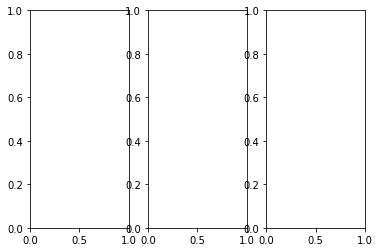

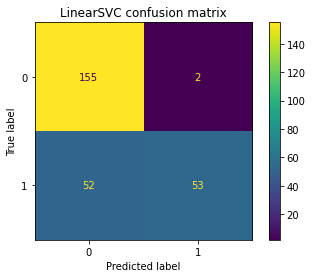

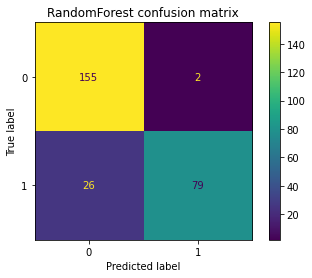

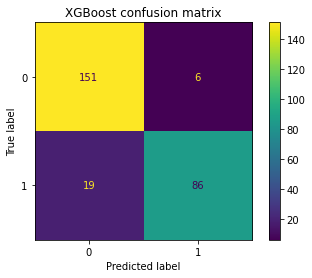

In [14]:

_,plot = plt.subplots(1,3)
plot[0] = skm.plot_confusion_matrix(SVM_learn,x_test,y_test)
plot[0].ax_.set_title('LinearSVC confusion matrix')
plot[1] = skm.plot_confusion_matrix(RAND_FOREST_learn,x_test,y_test)
plot[1].ax_.set_title('RandomForest confusion matrix')
plot[2] = skm.plot_confusion_matrix(XGBOOST_learn,x_test,y_test)
plot[2].ax_.set_title('XGBoost confusion matrix')

---
# Now I am trying on my method

In [15]:
csv = pd.read_csv('titanic_train.csv')

# Analyse on the data

pclass : higher class might have more chance to access the life boat , thus survive

name : junk (but need to connect back again)

sex : maybe man has more stamina to bear the cold water

age : same thought as sex

sibsp : ugh , maybe they will group up to same themselves

parch : same thought as sibsp

ticket: junk

fare : relating to higher class.

cabin: if the cabin is more closer to the deck , it still has more chance , but this data is missing a lot ,(considering to be junk)

embarked : junk

boat : if the person gets on the life boat , he/she has more chance

body : if the body was found , it is obvious the person is dead

home.dest : maybe colder country has more chance? but the data has too many classes , so junk it is.

In [16]:
#in here i think we need to throw some useless data
csv = csv.drop(columns=['name','ticket','embarked','home.dest','cabin'])
taking_argu = csv.columns
print(csv)




     pclass  survived     sex   age  sibsp  parch     fare boat  body
0         3         1  female   NaN      1      0  15.5000   16   NaN
1         3         0    male  25.0      0      0   7.7417  NaN   NaN
2         3         1    male  21.0      0      0   7.8208   13   NaN
3         1         0    male  46.0      0      0  79.2000  NaN   NaN
4         3         1  female  18.0      0      0   7.4958   16   NaN
..      ...       ...     ...   ...    ...    ...      ...  ...   ...
868       2         1  female  48.0      1      2  65.0000    9   NaN
869       3         0  female   NaN      0      2   7.7500  NaN   NaN
870       3         0    male  39.0      0      0   7.9250  NaN   NaN
871       1         0    male  28.0      0      0  47.1000  NaN   NaN
872       3         0    male   2.0      4      1  39.6875  NaN   NaN

[873 rows x 9 columns]


In [17]:
csv['boatx'] = csv['boat'].apply(lambda x: 1 if not pd.isnull(x) else 0)
csv['bodyx'] = csv['body'].apply(lambda x: 1 if not pd.isnull(x) else 0)
csv = csv.drop(columns=['boat','body'])
csv = csv.replace({'sex': {'female': 0, 'male': 1}})
csv_dummies = pd.get_dummies(csv)

In [18]:
nul_dataframe = pd.isna(csv_dummies) # requirement3 : filling Nan with column average
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    if(len(np.where(ser)[0])):       # find Nan
        csv_dummies[str(series_null)].fillna(value=0,inplace=True) # fillna with 0

In [19]:
survived = csv_dummies['survived']
csv_dummies_heat = csv_dummies
csv_dummies = csv_dummies.drop(columns=['survived'])

corr_matrix = csv_dummies_heat.corr() # for requirement 6 i extract the correlation matrix , to see whether it is correlated
#sns.heatmap(corr_matrix,annot = True, annot_kws={"size": 2})
print(corr_matrix)

            pclass  survived       sex       age     sibsp     parch  \
pclass    1.000000 -0.302535  0.126491 -0.436209  0.069850  0.030800   
survived -0.302535  1.000000 -0.538211  0.030145 -0.027794  0.058768   
sex       0.126491 -0.538211  1.000000  0.000730 -0.083626 -0.186702   
age      -0.436209  0.030145  0.000730  1.000000 -0.130111 -0.051906   
sibsp     0.069850 -0.027794 -0.083626 -0.130111  1.000000  0.372701   
parch     0.030800  0.058768 -0.186702 -0.051906  0.372701  1.000000   
fare     -0.560831  0.253802 -0.205817  0.204407  0.172724  0.227560   
boatx    -0.316044  0.953642 -0.496473  0.031730 -0.024762  0.067675   
bodyx    -0.069907 -0.249780  0.204233  0.223552 -0.027633 -0.022144   

              fare     boatx     bodyx  
pclass   -0.560831 -0.316044 -0.069907  
survived  0.253802  0.953642 -0.249780  
sex      -0.205817 -0.496473  0.204233  
age       0.204407  0.031730  0.223552  
sibsp     0.172724 -0.024762 -0.027633  
parch     0.227560  0.067675 -0.0

In [20]:
y_train , y_test = survived[:round(len(survived)*0.7)] , survived[round(len(survived)*0.7):]
x_train , x_test = csv_dummies[:round(len(survived)*0.7)] , csv_dummies[round(len(survived)*0.7):]
y_test = np.array(y_test) #splitting data set with ratio of 7:3 , for the first part of requirement4

In [21]:
SVM_learn = svm.LinearSVC().fit(x_train,y_train)
RAND_FOREST_learn = ske.RandomForestClassifier().fit(x_train,y_train)
XGBOOST_learn = xgboost.XGBClassifier().fit(x_train,y_train)

SVM_y_predict = SVM_learn.predict(x_test)
RAND_FOREST_y_predict = RAND_FOREST_learn.predict(x_test)
XGBOOST_y_predict = XGBOOST_learn.predict(x_test)

SVM_score = skm.f1_score(y_test,SVM_y_predict)
RAND_FOREST_score = skm.f1_score(y_test,SVM_y_predict)
XGBOOST_score = skm.f1_score(y_test,XGBOOST_y_predict)

print(SVM_score)
print(RAND_FOREST_score)
print(XGBOOST_score)

0.9556650246305419
0.9556650246305419
0.9607843137254903


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 1.0, 'XGBoost confusion matrix')

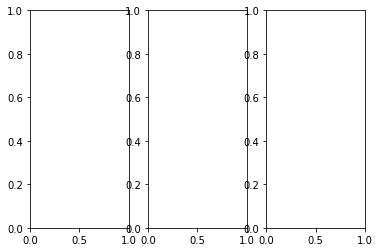

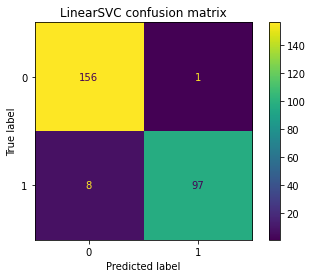

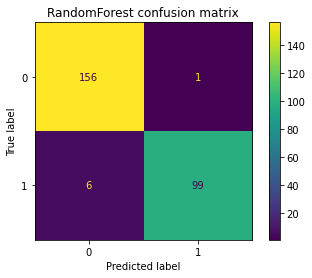

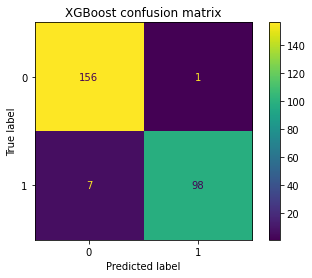

In [22]:
_,plot = plt.subplots(1,3)
plot[0] = skm.plot_confusion_matrix(SVM_learn,x_test,y_test)
plot[0].ax_.set_title('LinearSVC confusion matrix')
plot[1] = skm.plot_confusion_matrix(RAND_FOREST_learn,x_test,y_test)
plot[1].ax_.set_title('RandomForest confusion matrix')
plot[2] = skm.plot_confusion_matrix(XGBOOST_learn,x_test,y_test)
plot[2].ax_.set_title('XGBoost confusion matrix')

---
# prediction Ceil

In [23]:
test_csv = pd.read_csv('titanic_test.csv')
test_csv['survived'] =0
test_csv = test_csv[taking_argu]

test_csv['boatx'] = test_csv['boat'].apply(lambda x: 1 if not pd.isnull(x) else 0)
test_csv['bodyx'] = test_csv['body'].apply(lambda x: 1 if not pd.isnull(x) else 0)
test_csv = test_csv.drop(columns=['boat','body'])
test_csv = test_csv.replace({'sex': {'female': 0, 'male': 1}})
test_csv_dummies = pd.get_dummies(test_csv)

nul_dataframe = pd.isna(test_csv_dummies) # requirement3 : filling Nan with column average
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    if(len(np.where(ser)[0])):       # find Nan
        test_csv_dummies[str(series_null)].fillna(value=0,inplace=True) # fillna with 0

test_csv_dummies = test_csv_dummies.drop(columns=['survived'])

survive_pred_xg = XGBOOST_learn.predict(test_csv_dummies)
test_csv = pd.read_csv('titanic_test.csv')
write_csv = test_csv['name'].to_frame()
write_csv['survival'] = survive_pred_xg

write_csv.to_csv('titanic_pred.csv', index=False)

print(write_csv)

                                                  name  survival
0                   Vander Planke, Miss. Augusta Maria         0
1                      van Billiard, Mr. Austin Blyler         0
2                        Abelseth, Mr. Olaus Jorgensen         1
3                        Baclini, Miss. Helene Barbara         1
4                      Landergren, Miss. Aurora Adelia         1
..                                                 ...       ...
431                            Oreskovic, Miss. Marija         0
432  Vander Planke, Mrs. Julius (Emelia Maria Vande...         0
433                              Radeff, Mr. Alexander         0
434                             Lefebre, Miss. Jeannie         0
435                                Doling, Miss. Elsie         0

[436 rows x 2 columns]
